# Chapter 19: From Hypothesis Testing to Parameter Estimation

## Examples

### Is the Carnival Game Really Fair?

#### Label the hypotheses

* $H_1: P(\rm{prize}) = \frac{1}{2}$
* $H_2: P(\rm{prize}) = \frac{1}{20}$

#### Gather some data

After 100 trials we find the following:
* $\rm{prize} = 24$
* $\neg \rm{prize} = 76$

#### Find the Bayes factor

##### Find the likelihood of the data under each hypothesis


$$P\left( {D|{H_1}} \right) = {\left( {\frac{1}{2}} \right)^{24}} \times {\left( {1 - \frac{1}{2}} \right)^{76}}$$
$$P\left( {D|{H_2}} \right) = {\left( {\frac{1}{{20}}} \right)^{24}} \times {\left( {1 - \frac{1}{{20}}} \right)^{76}}$$

##### Find the ratio

$$BF = \frac{{P\left( {D|{H_1}} \right)}}{{P\left( {D|{H_2}} \right)}} = \frac{{{{\left( {\frac{1}{2}} \right)}^{24}} \times {{\left( {1 - \frac{1}{2}} \right)}^{76}}}}{{{{\left( {\frac{1}{{20}}} \right)}^{24}} \times {{\left( {1 - \frac{1}{{20}}} \right)}^{76}}}} = 652.72$$

The hypothesis that the game is fair explains the observations about 653 times better than the hypothesis that the true rate of wins is only $\frac{1}{20}$.

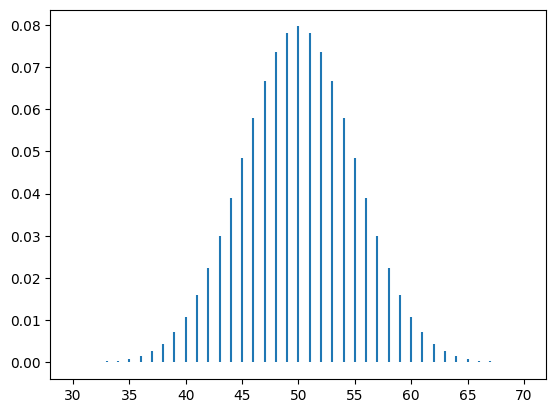

'The probability of seeing 24 or fewer prizes if the probability of winning is (1/2) is: 0.0000090500%'

In [189]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

H1_dist = binom(100, (1/2))
x = np.arange(30, 71)
y = H1_dist.pmf(x)

fig, ax = plt.subplots(1,1)
ax.vlines(x,0, y)
plt.show()

display(f"The probability of seeing 24 or fewer prizes if the probability of winning is (1/2) is: {H1_dist.cdf(24):.10%}")


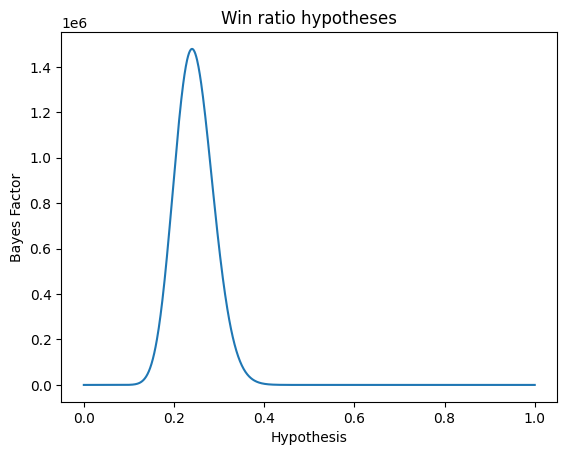

'The highest bayes factor is 1478752.5717556716 for win rate 0.24024024024024024'

In [190]:
def p_func(p: np.array) -> np.array:
    return np.power(p, 24) * np.power((1-p),76)

H1_P = pow((1/2), 24) * pow((1/2), 76)
def df_func(p: np.array, denom: float =H1_P) -> np.array:
    return p_func(p)/H1_P


x = np.linspace(0, 1, 1_000)
y = df_func(x)
fig, ax = plt.subplots(1,1)
ax.plot(x, y)
ax.set_title("Win ratio hypotheses")
ax.set_ylabel("Bayes Factor")
ax.set_xlabel("Hypothesis")
plt.show()

display(f"The highest bayes factor is {y.max()} for win rate {x.item(y.argmax())}")

Text(0.5, 0, 'Hypotheses')

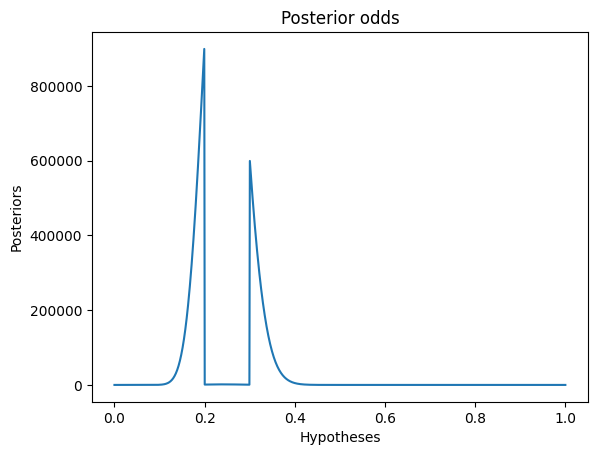

In [191]:
priors = np.ones(x.size)
priors[(x >= 0.2) & (x <= 0.3)] = 1/1000
posteriors = priors*y
fig, ax = plt.subplots(1,1)
ax.plot(x, posteriors)
ax.set_title("Posterior odds")
ax.set_ylabel("Posteriors")
ax.set_xlabel("Hypotheses")

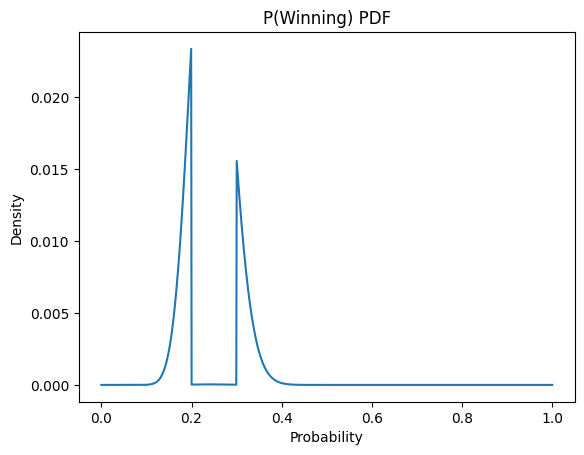

In [192]:
ducks_pdf = posteriors / posteriors.sum()
fig, ax = plt.subplots(1,1)
ax.plot(x, ducks_pdf)
ax.set_title("P(Winning) PDF")
ax.set_xlabel("Probability")
ax.set_ylabel("Density")
plt.show()

In [193]:
p_understimate = ducks_pdf[x<.5].sum()

display(f"The probability that the true rate of winning draws is less than 1/2 is: {p_understimate}")

'The probability that the true rate of winning draws is less than 1/2 is: 0.9999997589906652'

In [194]:
expected_value = (x * ducks_pdf).sum()
most_likely_value = x.item(ducks_pdf.argmax())
display(f"The expected value of the game is: {expected_value}")
display(f"The most likely single value is: {most_likely_value}")

'The expected value of the game is: 0.24054531340391858'

'The most likely single value is: 0.1991991991991992'

#### From the Bayes Factor to Parameter Estimation

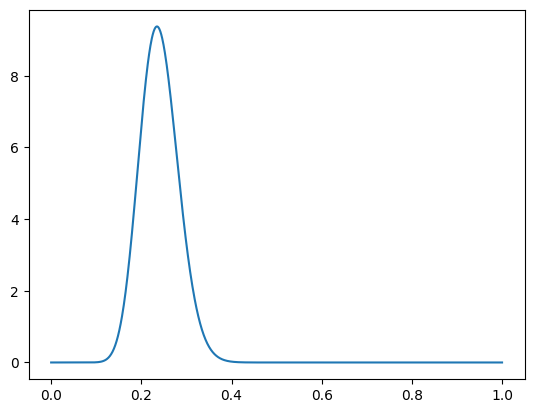

In [195]:
from scipy.stats import beta
ducks_beta = beta(24,76)
fig, ax = plt.subplots(1,1)
ax.plot(x, ducks_beta.pdf(x), label="Beta")
# ax.plot(x, y, '--', label="Bayes")
plt.show()

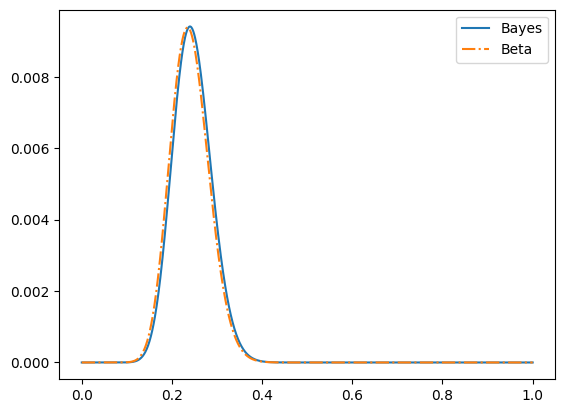

In [196]:
ducks_beta_scaled = ducks_beta.pdf(x)* 1/1000
fig, ax = plt.subplots(1,1)
ax.plot(x, y / y.sum(), '-', label="Bayes")
ax.plot(x, ducks_beta_scaled,"-.", label="Beta")
ax.legend()

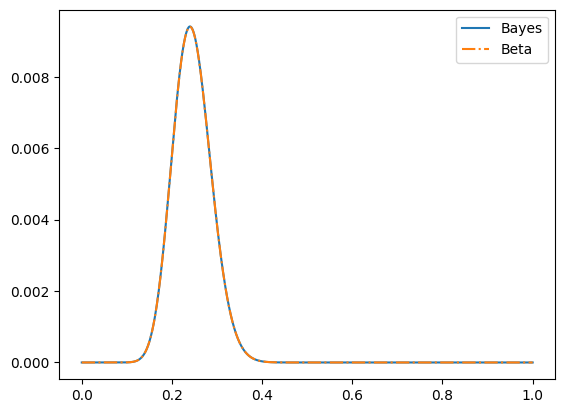

In [197]:
ducks_beta_scaled = beta.pdf(x, 24+1,76+1)* 1/1000
fig, ax = plt.subplots(1,1)
ax.plot(x, y / y.sum(), '-', label="Bayes")
ax.plot(x, ducks_beta_scaled,"-.", label="Beta")
ax.legend()

As the above series of plots shows, it's posible to turn a collection of posterior odds into a probability distribution, and it's possiblble to re-construct a beta distribution from a collection of hypotheses.

## Exercises

1.  Our Bayes factor assumed that we were looking at $H_1: P(\rm{prize}) = 0.5$.  This allowed us to derive a version of the beta distribution with an alpha of 1 and a beta of 1.  Would it matter if we chose a different probability for $H_1$?  Assume $H_1: P(\rm{prize}) = 0.24$ then see if the resulting distribution, once normalized to sum to 1, is any different than the original hypothesis.
2.  Write a prior for the distribution in which each hypothesis is 1.04 times more likely than the previous hypothesis (assume our $dx$ remains the same).
3.  Suppose you observed anotehr duck game that included 34 ducks with prizes and 66 ducks without prizes.  How would you set up a test to answer "What is the probability that you have a better chane of winning a prize in this game than in the game we used in our eample?  Implementing this requires a bit more sophistication than the R used in this book, but see if you can learn this on your own to kick off your adventures in more advanced Bayesian statistics!

## Exercise 1

>  1.  Our Bayes factor assumed that we were looking at $H_1: P(\rm{prize}) = 0.5$.  This allowed us to derive a version of the beta distribution with an alpha of 1 and a beta of 1.  Would it matter if we chose a different probability for $H_1$?  Assume $H_1: P(\rm{prize}) = 0.24$ then see if the resulting distribution, once normalized to sum to 1, is any different than the original hypothesis.

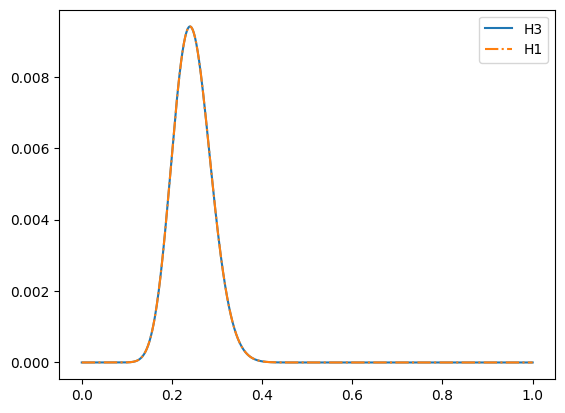

In [198]:
H3_P = pow(24, 0.24) * pow(1-0.24, 76)
H3_BFs = df_func(x, H3_P)
H3_pdf = H3_BFs / np.sum(H3_BFs)

fig, ax = plt.subplots(1,1)
ax.plot(x, H3_pdf, label="H3")
ax.plot(x, y / np.sum(y), "-.", label="H1")
ax.legend()
plt.show()


No, after being normalized, the distribution of bayes factors for alternative hypotheses does not look different between a starting assumption (denominator) with a probability of 0.5 or a probability of 0.24

### Exercise 2

> 2.  Write a prior for the distribution in which each hypothesis is 1.05 times more likely than the previous hypothesis (assume our $dx$ remains the same).

I've been using 1,000 increments between 0 and 1 to do my graphing.  The book uses only 100.  I'll have to do that here to make sure that our results match.

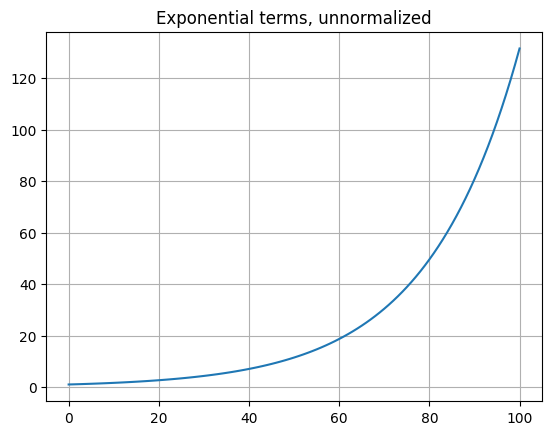

In [199]:
x_prime = np.arange(101)
x = x_prime / 100
y = np.full_like(x_prime, 1.05, dtype=np.float_)
y = np.power(y, x_prime)

fig, ax = plt.subplots(1,1)
ax.plot(x_prime, y)
plt.grid(True)
ax.set_title("Exponential terms, unnormalized")
plt.show()


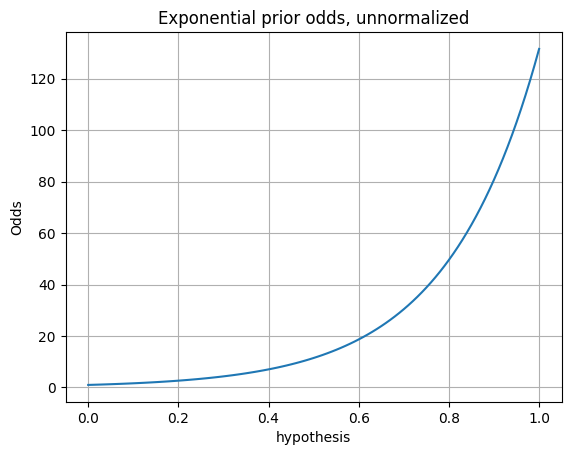

In [200]:
fig, ax = plt.subplots(1,1)
ax.plot(x,y)
ax.grid(True)
ax.set_title("Exponential prior odds, unnormalized")
ax.set_xlabel("hypothesis")
ax.set_ylabel("Odds")
plt.show()
exponential_prior_odds = y

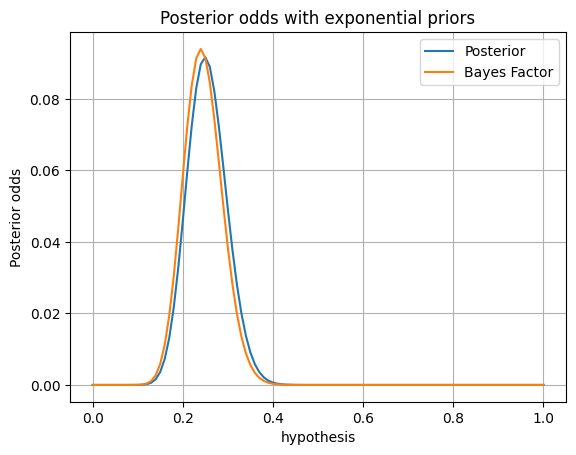

In [201]:
x_prime = np.arange(101)
x = x_prime / 100
bfs = df_func(x)
bfs = bfs/np.sum(bfs)
y = bfs * exponential_prior_odds
y = y / np.sum(y)
fig, ax = plt.subplots(1,1)
ax.plot(x, y, label="Posterior")
ax.plot(x, bfs, label="Bayes Factor")
ax.set_title("Posterior odds with exponential priors")
ax.set_ylabel("Posterior odds")
ax.set_xlabel("hypothesis")
ax.grid(True)
ax.legend()
plt.show()

### Exercise 3

>  3.  Suppose you observed another duck game that included 34 ducks with prizes and 66 ducks without prizes.  How would you set up a test to answer "What is the probability that you have a better chane of winning a prize in this game than in the game we used in our eample?  Implementing this requires a bit more sophistication than the R used in this book, but see if you can learn this on your own to kick off your adventures in more advanced Bayesian statistics!

#### Manual approximation

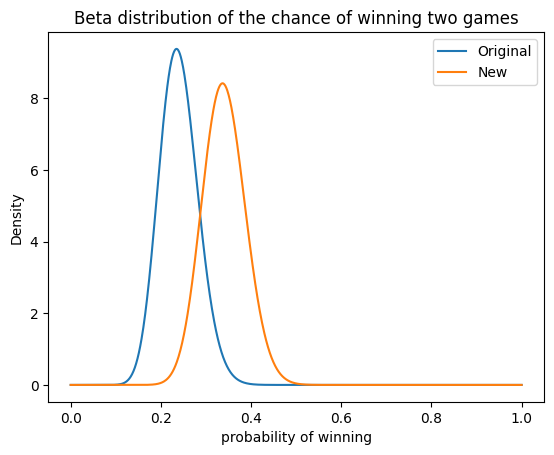

In [202]:
G1_beta = beta(24, 76)
G2_beta = beta(34, 66)
x = np.linspace(0, 1, 1_000)
fig, ax = plt.subplots(1,1)
ax.plot(x, G1_beta.pdf(x), label="Original")
ax.plot(x, G2_beta.pdf(x), label="New")
ax.set_xlabel("probability of winning")
ax.set_ylabel("Density")
ax.set_title("Beta distribution of the chance of winning two games")
ax.legend()
plt.show()

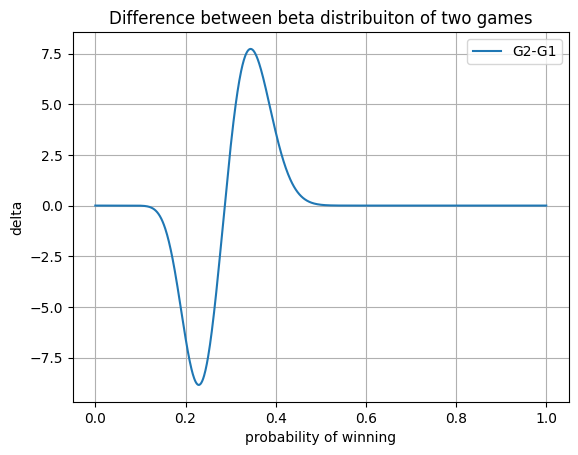

In [203]:
G1_beta = beta(24, 76)
G2_beta = beta(34, 66)
x = np.linspace(0, 1, 1_000)
diffs = G2_beta.pdf(x) - G1_beta.pdf(x)
fig, ax = plt.subplots(1,1)
ax.plot(x, diffs, label="G2-G1")
ax.set_xlabel("probability of winning")
ax.set_ylabel("delta")
ax.set_title("Difference between beta distribuiton of two games")
ax.legend()
ax.grid(True)
plt.show()

The root we want is somewhere between 0.2 and 0.4.  Note that this function has lots of zeroes on the extreme ends of the distribution because neither game has an significant chance of such extreme probabilities.  We can't get distracted by those.

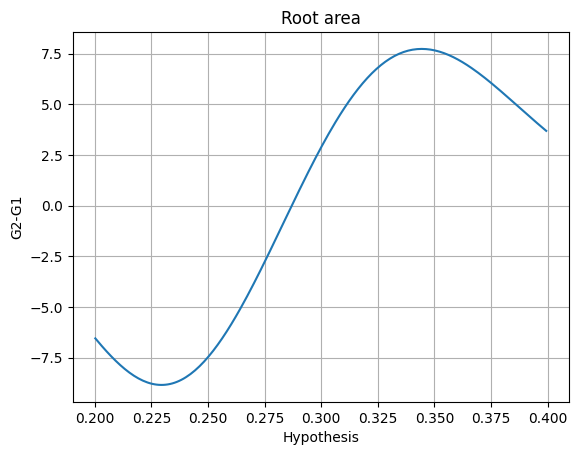

In [204]:
root_x = x[(x>=0.2) & (x<0.4)]
root_area = diffs[(x>=0.2) & (x<0.4)]
fig, ax = plt.subplots(1,1)
ax.plot(root_x, root_area)
ax.set_title("Root area")
ax.set_xlabel("Hypothesis")
ax.set_ylabel("G2-G1")
ax.grid(True)
plt.show()

In [205]:
min_difference = np.absolute(root_area).min()
min_difference_idx = np.absolute(root_area).argmin()
min_difference_hypothesis = root_x.item(min_difference_idx)
display(f"The minimum difference in the graph is {min_difference} at index {min_difference_idx} and hypothesis {min_difference_hypothesis}")

'The minimum difference in the graph is 0.06668437160474028 at index 87 and hypothesis 0.2872872872872873'

Now we need to find the area under the G2 beta distribution from the point where the distributions meet to positive infinity.  In scipy this is the survival function `sf()`

In [206]:
display(f"The probability that G2 has a higher chance of winning than G1 is {G2_beta.sf(min_difference_hypothesis)}")

'The probability that G2 has a higher chance of winning than G1 is 0.8686920610740166'

#### Monte Carlo appoximation

In [212]:
G1_values = G1_beta.rvs(size=100_000)
G2_values = G2_beta.rvs(size=100_000)

monte_carlo_P_G2 = np.count_nonzero(G2_values > G1_values) / G2_values.size
display(f"The probability that G2 wins more often than G1 is: {monte_carlo_P_G2}")


'The probability that G2 wins more often than G1 is: 0.94126'

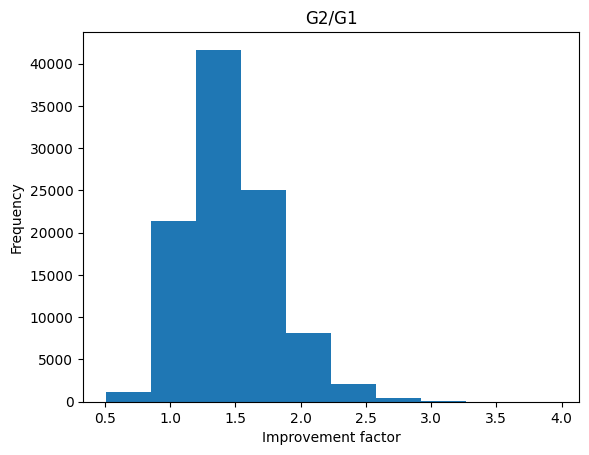

In [215]:
hist_data = G2_values / G1_values
fig, ax = plt.subplots(1,1)
ax.hist(hist_data)
ax.set_title("G2/G1")
ax.set_xlabel("Improvement factor")
ax.set_ylabel("Frequency")
plt.show()

#### Root finding and integration

In [219]:
from scipy.optimize import brentq

def diff_func(x):
    return G2_beta.pdf(x) - G1_beta.pdf(x)

root_location = brentq(diff_func, 0.2, 0.4)
G2_survival_proportion = G2_beta.sf(root_location)
display(f"The beta distributions insterct at {root_location} and {G2_survival_proportion} of G2 is to the right of this point.")


'The beta distributions insterct at 0.28699934598293886 and 0.8700619769911402 of G2 is to the right of this point.'

#### Numerical integration of the difference function

In [227]:
from scipy.integrate import quad

display(f"The total area under the difference curve is: {quad(diff_func, np.inf, np.inf)[0]}")
display(f"The area under the difference curve to the right of 0 is: {quad(diff_func, 0, np.inf)}")
display(f"The area under the difference curve to the right of the root is: {quad(diff_func, root_location, np.inf)}")


'The total area under the difference curve is: 0.0'

'The area under the difference curve to the right of 0 is: (5.645661263538434e-16, 1.5949079407612876e-10)'

'The area under the difference curve to the right of the root is: (0.7333609388555987, 1.1740461085098092e-08)'

#### Multiplying the hypotheses by their probability

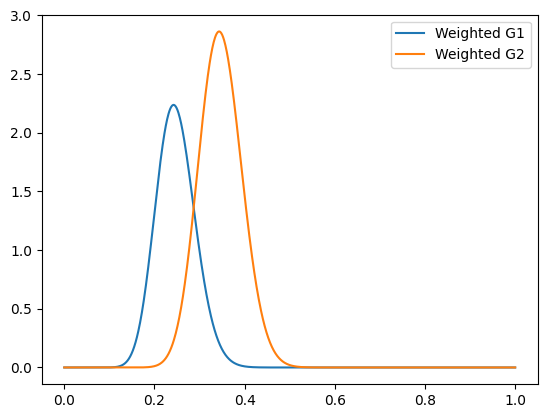

In [233]:
G1_weighted = lambda x : G1_beta.pdf(x) * x
G2_weighted = lambda x: G2_beta.pdf(x) * x
fig, ax = plt.subplots(1,1)
ax.plot(x, G1_weighted(x),label="Weighted G1") 
ax.plot(x, G2_weighted(x), label="Weighted G2")
ax.legend()
plt.show()


In [235]:
def weighted_diff_func(x):
    return G2_weighted(x) - G1_weighted(x)

weighted_root = brentq(weighted_diff_func, 0.2, 0.4)
weighted_area = quad(weighted_diff_func, weighted_root, np.inf)
display(f"The intersection of the weighted functions is {weighted_root} and {weighted_area} of G2 is to the right of it")



'The intersection of the weighted functions is 0.28699934598292803 and (0.26301282302445517, 1.2870983584001901e-08) of G2 is to the right of it'

#### Conclusions from all this experimenting

I'm confident that the monte-carlo method gives the most correct answer, given that we use the same mthod elsewhere in the book and it is comparable to the methods described in the suggest solution.  Clearly I need to improve my understanding of why the other methods don't work.  But I'm not going to do that by guessing randomly here, so it is time to pick another book.